In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
file_path = "EduPro_Online_Platform_Dataset.xlsx"

users = pd.read_excel(file_path, sheet_name="Users")
courses = pd.read_excel(file_path, sheet_name="Courses")
transactions = pd.read_excel(file_path, sheet_name="Transactions")


In [3]:
users.head(), courses.head(), transactions.head()


(   UserID        UserName  Age  Gender                             Email
 0  U00001    wilsonjordan   15    Male            patricia27@hotmail.com
 1  U00002        angela22   29  Female             hallrandy@hotmail.com
 2  U00003  morrisonamanda   33  Female               ganderson@yahoo.com
 3  U00004       fthornton   23  Female  christensencatherine@outlook.com
 4  U00005  fostergeoffrey   21    Male            karenfuentes@yahoo.com,
   CourseID              CourseName CourseCategory CourseType   CourseLevel  \
 0  CR00001           Python Basics    Programming       Paid      Beginner   
 1  CR00002        Java Programming    Programming       Free  Intermediate   
 2  CR00003       C++ for Beginners    Programming       Free      Beginner   
 3  CR00004         Advanced Python    Programming       Free      Beginner   
 4  CR00005  Full Stack Development    Programming       Free      Beginner   
 
    CoursePrice  CourseDuration  CourseRating  
 0       472.28           11.00

In [4]:
users.info(),courses.info(),transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   UserID    3000 non-null   object
 1   UserName  3000 non-null   object
 2   Age       3000 non-null   int64 
 3   Gender    3000 non-null   object
 4   Email     3000 non-null   object
dtypes: int64(1), object(4)
memory usage: 117.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CourseID        60 non-null     object 
 1   CourseName      60 non-null     object 
 2   CourseCategory  60 non-null     object 
 3   CourseType      60 non-null     object 
 4   CourseLevel     60 non-null     object 
 5   CoursePrice     60 non-null     float64
 6   CourseDuration  60 non-null     float64
 7   CourseRating    60 non-null     float64
dtypes: float64(3), obje

(None, None, None)

In [6]:
users.describe()


,Age
count,3000.000000
mean,24.974333
std,6.046475
min,15.000000
25%,20.000000
50%,25.000000
75%,30.000000
max,35.000000


In [7]:
users.isnull().sum()


UserID      0
UserName    0
Age         0
Gender      0
Email       0
dtype: int64

In [8]:
users = users[(users["Age"] >= 10) & (users["Age"] <= 70)]


In [9]:
users["Gender"] = users["Gender"].str.capitalize()


In [10]:
transactions["TransactionDate"] = pd.to_datetime(transactions["TransactionDate"])


In [11]:
bins = [0, 17, 25, 35, 45, 100]
labels = ["<18", "18-25", "26-35", "36-45", "45+"]

users["AgeGroup"] = pd.cut(users["Age"], bins=bins, labels=labels)


In [12]:
users["AgeGroup"].value_counts()


AgeGroup
26-35    1446
18-25    1121
<18       433
36-45       0
45+         0
Name: count, dtype: int64

In [13]:
df = pd.merge(transactions, users, on="UserID", how="inner")
df = pd.merge(df, courses, on="CourseID", how="inner")


In [14]:
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    10000 non-null  object        
 1   UserID           10000 non-null  object        
 2   CourseID         10000 non-null  object        
 3   TransactionDate  10000 non-null  datetime64[ns]
 4   Amount           10000 non-null  float64       
 5   PaymentMethod    10000 non-null  object        
 6   TeacherID        10000 non-null  object        
 7   UserName         10000 non-null  object        
 8   Age              10000 non-null  int64         
 9   Gender           10000 non-null  object        
 10  Email            10000 non-null  object        
 11  AgeGroup         10000 non-null  category      
 12  CourseName       10000 non-null  object        
 13  CourseCategory   10000 non-null  object        
 14  CourseType       10000 non-null  object

In [15]:
total_enrollments = df.shape[0]
total_enrollments


10000

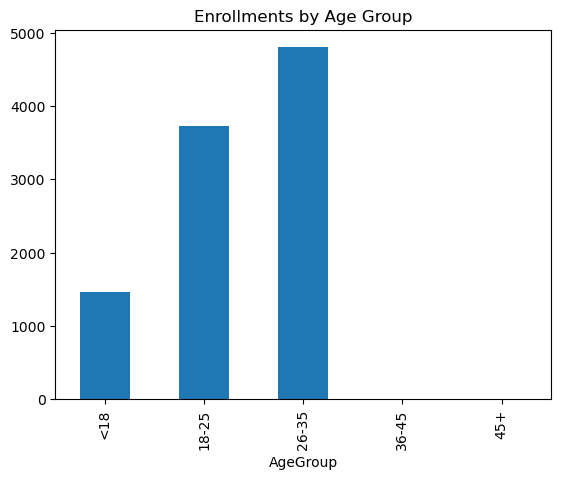

In [16]:
df["AgeGroup"].value_counts().sort_index().plot(
    kind="bar", title="Enrollments by Age Group"
)
plt.show()


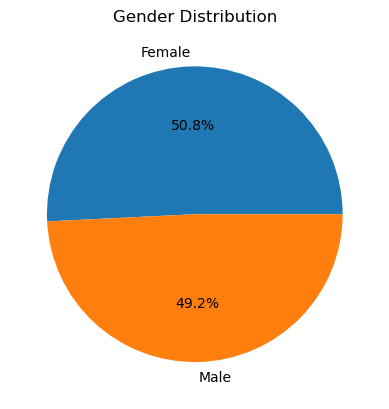

In [17]:
df["Gender"].value_counts().plot(
    kind="pie", autopct="%1.1f%%", title="Gender Distribution"
)
plt.ylabel("")
plt.show()


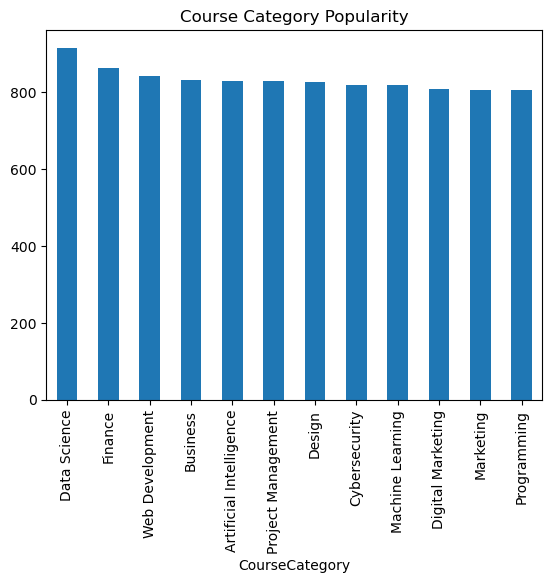

In [18]:
df["CourseCategory"].value_counts().plot(
    kind="bar", title="Course Category Popularity"
)
plt.show()


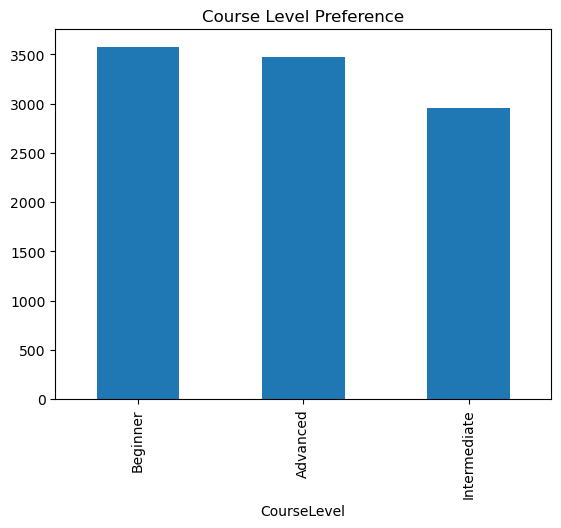

In [19]:
df["CourseLevel"].value_counts().plot(
    kind="bar", title="Course Level Preference"
)
plt.show()


C:\Users\mahat\AppData\Local\Temp\ipykernel_15620\3384802594.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = pd.pivot_table(


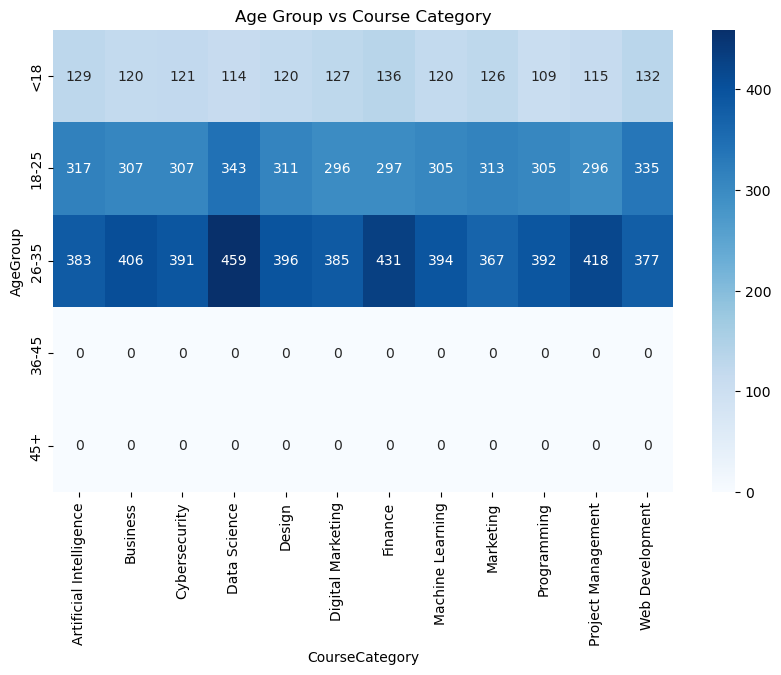

In [20]:
pivot = pd.pivot_table(
    df,
    index="AgeGroup",
    columns="CourseCategory",
    values="CourseID",
    aggfunc="count"
)

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="Blues")
plt.title("Age Group vs Course Category")
plt.show()
